# EDA-Schema Dataset Analysis

This notebook analyzes sample data from the **EDA-Schema open dataset (version 1.1)**. The dataset is designed as a general resource for analysis and machine learning and is publicly available [here](https://drive.google.com/drive/folders/1B3rBvbnviBrKw1aLRpv7e1pEXSCy_vLQ?usp=sharing). Below are the key details:

### Dataset Specifications:
- **Physical Design Toolset**: OpenROAD  
- **Design PDK**: SkyWater 130 HD  
- **Parameter Setup/Constraints**:  
  - Clock latency: 0.01 ns  
  - Clock input delay: 0.01 ns  
  - Clock output delay: 0.01 ns  
  - Utilization: 30%  
  - Aspect ratio: 1.0  
  - Clock uncertainty (setup/hold): 0.2 ns  

### Dataset Purpose:
The dataset focuses on circuit timing performance under two scenarios:  

1. Barely failing timing (id-000001), with worst slack values designed to stay within the range of **[-0.5 ns, 0 ns]** and absolute worst slack to target clock ratio less than 10%.
2. Barely passing timing (id-000002), with worst slack values designed to stay within the range of **[0 ns, 0.5 ns]** and absolute worst slack to target clock ratio less than 10%.

This ensures the data is suitable for timing-critical analysis and optimization tasks.

### Timing Summary:

| **Circuit**       | **Target Clock Period (ns)** (Barely Fail: id-000001) | **Worst Slack (ns)** (Barely Fail: id-000001) | **Target Clock Period (ns)** (Barely Pass: id-000002) | **Worst Slack (ns)** (Barely Pass: id-000002) |
|--------------------|-------------------------------------------|-------------------------------------|--------------------------------------------|-------------------------------------|
| **ac97_ctrl**      | 3                                         | -0.1823                             | 3.25                                       | 0.1333                              |
| **aes_core**       | 3.5                                       | -0.1999                             | 3.75                                       | 0.0458                              |
| **des3_area**      | 3.75                                      | -0.0119                             | 4                                          | 0.1823                              |
| **i2c**            | 2.25                                      | -0.1594                             | 2.5                                        | 0.0658                              |
| **mem_ctrl**       | 5                                         | -0.0863                             | 5.25                                       | 0.1420                              |
| **pci**            | 3.75                                      | -0.1326                             | 4                                          | 0.1548                              |
| **sasc**           | 1.75                                      | -0.0992                             | 2                                          | 0.1752                              |
| **simple_spi**     | 2                                         | -0.1452                             | 2.25                                       | 0.1232                              |
| **spi**            | 4.25                                      | -0.1739                             | 4.5                                        | 0.2488                              |
| **ss_pcm**         | 1.625                                     | -0.0144                             | 1.75                                       | 0.1107                              |
| **systemcaes**     | 4.75                                      | -0.1644                             | 5                                          | 0.0050                              |
| **systemcdes**     | 4                                         | -0.0069                             | 4.25                                       | 0.3052                              |
| **tv80**           | 7                                         | -0.0294                             | 7.25                                       | 0.1227                              |
| **usb_funct**      | 2.5                                       | -0.0917                             | 2.75                                       | 0.1018                              |
| **usb_phy**        | 1.75                                      | -0.0449                             | 2                                          | 0.1821                              |
| **wb_dma**         | 3                                         | -0.0746                             | 3.25                                       | 0.0708                              |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


# Import EDA_schema library functions
from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

# Define the dataset directory (adjust the path if needed)
DATASET_DIR = "dataset/dataset_openroad_sky130hd_iwls05_v1.1"
dataset = Dataset(SQLitePickleDB(DATASET_DIR))

## General Statistics

The general statistics of the dataset provide valuable insights into the diversity and variation among different circuit designs. These statistics showcase differences across various circuit characteristics, such as the number of inputs, outputs, nets, and cells, which collectively contribute to the unique properties of each design.

In [17]:
# --- Data Loading ---
# Extracting and merging key tables from the database
netlist_df = dataset.db.get_table_data("netlists")
cell_metrics_df = dataset.db.get_table_data("cell_metrics")
area_metrics_df = dataset.db.get_table_data("area_metrics")
power_metrics_df = dataset.db.get_table_data("power_metrics")
critical_path_df = dataset.db.get_table_data("critical_path_metrics")

# Combine all the extracted data into a single DataFrame
df = (
    netlist_df
    .merge(cell_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(area_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(power_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(critical_path_df, on=["circuit", "netlist_id", "phase"], how="inner")
)

# Convert phase column to categorical for ordered operations
df['phase'] = df['phase'].astype(pd.CategoricalDtype(PHASES, ordered=True))

# Select columns for analysis
columns = ["circuit", "netlist_id", "no_of_inputs", "no_of_outputs", "no_of_nets", "no_of_cells", "no_of_sequential_cells", "no_of_buffers", "no_of_inverters", "no_of_fillers", "no_of_tap_cells"]
summary_df = df[df.phase=="detailed_route"][columns].set_index(['circuit', 'netlist_id']).sort_index()
for col in summary_df.columns:
    if pd.api.types.is_numeric_dtype(summary_df[col]):
        summary_df[col] = summary_df[col].astype(int)

summary_df

no_of_inputs  no_of_outputs  no_of_nets  no_of_cells  \
circuit    netlist_id                                                         
ac97_ctrl  id-000001             84             48        6664        36961   
           id-000002             84             48        6660        37048   
aes_core   id-000001            259            129       13751        63102   
           id-000002            259            129       13529        63244   
des3_area  id-000001            240             64        3889        14980   
           id-000002            240             64        3884        14889   
i2c        id-000001             19             14         728         4572   
           id-000002             19             14         717         2990   
mem_ctrl   id-000001            115            152        6148        35988   
           id-000002            115            152        6120        35985   
pci        id-000001            162            207       14112        91245   
           id-000002            162            207       14045        91221   
sasc       id-000001             16             12         448         3210   
           id-000002             16             12         448         2169   
simple_spi id-000001             16             12         562         2638   
           id-000002             16             12         560         3881   
spi        id-000001             47             45        1864        10867   
           id-000002             47             45        1890        10935   
ss_pcm     id-000001             19              9         355         2364   
           id-000002             19              9         355         2366   
systemcaes id-000001            260            129        5782        22132   
           id-000002            260            129        5765        21969   
systemcdes id-000001            132             65        1890         6977   
           id-000002            132             65        1888         6884   
tv80       id-000001             14             32        4639        17116   
           id-000002             14             32        4686        24634   
usb_funct  id-000001            128            121       10098        41540   
           id-000002            128            121       10101        41454   
usb_phy    id-000001             15             18         415         2737   
           id-000002             15             18         406         1843   
wb_dma     id-000001            217            215        2962        11212   
           id-000002            217            215        2976        16342   

                       no_of_sequential_cells  no_of_buffers  no_of_inverters  \
circuit    netlist_id                                                           
ac97_ctrl  id-000001                     2211            478               84   
           id-000002                     2211            473               84   
aes_core   id-000001                      562           1889              139   
           id-000002                      562           1743              134   
des3_area  id-000001                       64           1106               45   
           id-000002                       64           1104               45   
i2c        id-000001                      129             95               16   
           id-000002                      129             82               16   
mem_ctrl   id-000001                     1051            936               76   
           id-000002                     1051            903               76   
pci        id-000001                     3220           1207               94   
           id-000002                     3220           1176               95   
sasc       id-000001                      118             72               20   
           id-000002                      118             70               20   
simple_spi id-000001                    

---
## Power, Performance, Area Analysis

Analyze and visualize PPA metrics to understand design trade-offs. The dataset captures variations in power, performance, and area across circuits, highlighting opportunities for optimization and offering insights into efficient design practices.

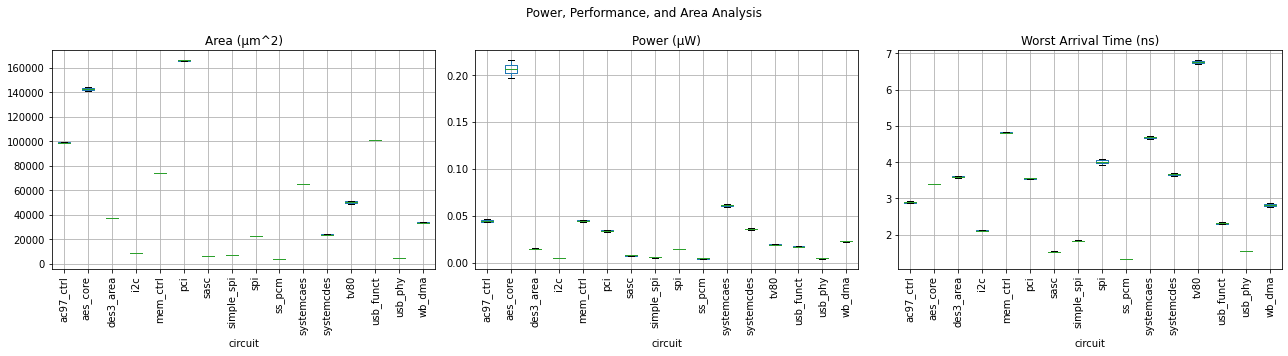

In [3]:
# Plot the distribution of total area, power, and timing metrics.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
columns = ["total_area", "total_power", "worst_arrival_time"]
xlabels = ["Area (µm^2)", "Power (µW)", "Worst Arrival Time (ns)"]

for i, col in enumerate(columns):
    df[df.phase == "detailed_route"].boxplot(column=[col], by='circuit', ax=axes[i])
    axes[i].yaxis.get_major_formatter().set_scientific(False)
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.suptitle('Power, Performance, and Area Analysis')
plt.tight_layout()
plt.show()

---
## Timing Analysis

The timing path analysis identifies critical paths and slack violations across circuits. By evaluating worst slack and violated paths under barely passing (0 to 0.5 ns) and barely failing (-0.5 to 0 ns) scenarios, the dataset highlights timing-critical aspects.

No. of timing paths  No. of violated timing paths  \
circuit    netlist_id                                                      
ac97_ctrl  id-000001                 11507                             4   
           id-000002                 11507                             0   
aes_core   id-000001                  3455                           105   
           id-000002                  3455                             0   
des3_area  id-000001                   640                             3   
           id-000002                   640                             0   
i2c        id-000001                   833                           301   
           id-000002                   833                             0   
mem_ctrl   id-000001                  6460                            26   
           id-000002                  6460                             0   
pci        id-000001                 17684                           210   
           id-000002                 17684                             0   
sasc       id-000001                   662                           174   
           id-000002                   662                             0   
simple_spi id-000001                   739                            61   
           id-000002                   739                             0   
spi        id-000001                  1599                          1370   
           id-000002                  1599                             0   
ss_pcm     id-000001                   480                             2   
           id-000002                   480                             0   
systemcaes id-000001                  4665                          1510   
           id-000002                  4665                             0   
systemcdes id-000001                  1465                             2   
           id-000002                  1465                             0   
tv80       id-000001                  1965                            32   
           id-000002                  1965                             0   
usb_funct  id-000001                  6103                            18   
           id-000002                  6037                             0   
usb_phy    id-000001                   630                             5   
           id-000002                   630                             0   
wb_dma     id-000001                  3774                            12   
           id-000002                  3774                             0   

                       Worst Slack (ns)    TNS (ns)  
circuit    netlist_id                                
ac97_ctrl  id-000001          -0.182309   -0.667137  
           id-000002           0.133329    0.000000  
aes_core   id-000001          -0.199885   -4.713289  
           id-000002           0.045823    0.000000  
des3_area  id-000001          -0.011935   -0.015964  
           id-000002           0.182252    0.000000  
i2c        id-000001          -0.159418  -14.961850  
           id-000002           0.065763    0.000000  
mem_ctrl   id-000001          -0.086298   -0.555081  
           id-000002           0.141991    0.000000  
pci        id-000001          -0.132643  -10.400303  
           id-000002           0.154832    0.000000  
sasc       id-000001          -0.099185   -8.564089  
           id-000002           0.175233    0.000000  
simple_spi id-000001          -0.145162   -2.364093  
           id-000002           0.123199    0.000000  
spi        id-000001          -0.173942 -126.546592  
           id-000002           0.248844    0.000000  
ss_pcm     id-000001          -0.014350   -0.028701  
           id-000002           0.110650    0.000000  
systemcaes id-000001          -0.164417  -57.565371  
           id-000002           0.005043    0.000000  
systemcdes id-000001          -0.006915   -0.009631  
           id-000002           0.305235    0.000000  
tv80       id-000001          -0.0

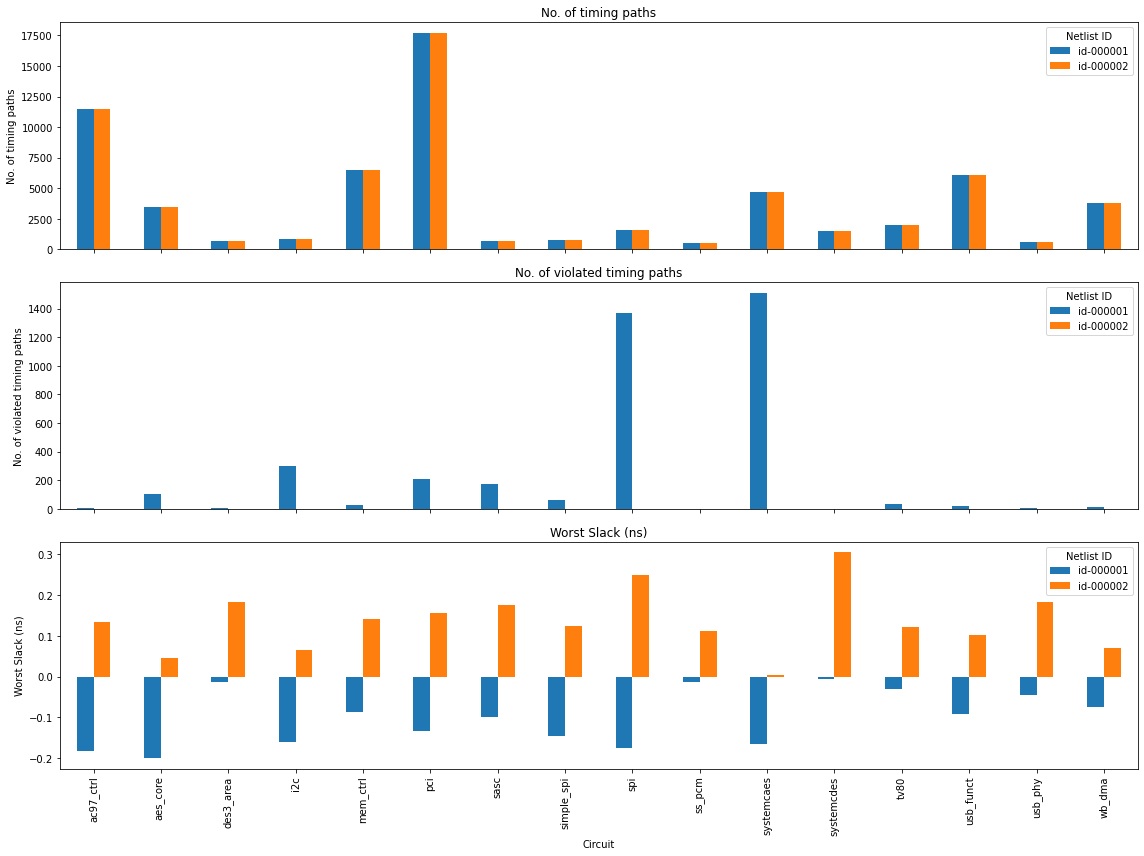

In [4]:
def get_min_slack(group):
    return group.loc[group['slack'].idxmin()]

timing_path_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
slack_df = timing_path_df.groupby(["circuit", "netlist_id"]).apply(get_min_slack)

# Add summary metrics for visualization
timing_path_summary_df = pd.DataFrame(index=slack_df.index)
timing_path_summary_df["No. of timing paths"] = timing_path_df.groupby(["circuit", "netlist_id"]).size()
timing_path_summary_df["No. of violated timing paths"] = timing_path_df[timing_path_df.slack < 0].groupby(["circuit", "netlist_id"]).size()
timing_path_summary_df["Worst Slack (ns)"] = slack_df["slack"]
timing_path_summary_df["TNS (ns)"] = timing_path_df[timing_path_df.slack<0].groupby(["circuit", "netlist_id"]).sum().slack
timing_path_summary_df.fillna(0, inplace=True)
timing_path_summary_df["No. of violated timing paths"] = timing_path_summary_df["No. of violated timing paths"].astype(int)

display(timing_path_summary_df)

# Plot timing analysis metrics
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
metrics = ["No. of timing paths", "No. of violated timing paths", "Worst Slack (ns)"]

for ax, metric in zip(axes.flatten(), metrics):
    timing_path_summary_df[metric].unstack().plot(kind="bar", ax=ax, title=metric)
    ax.set_ylabel(metric)
    ax.set_xlabel("Circuit")
    ax.legend(title="Netlist ID")

plt.tight_layout()
plt.show()

---
## Inter-Phase Analysis

Analyze and visualize inter-phase trends for metrics like area, power, arrival time, and worst slack. 
This analysis highlights how these metrics evolve across different design stages (phases).

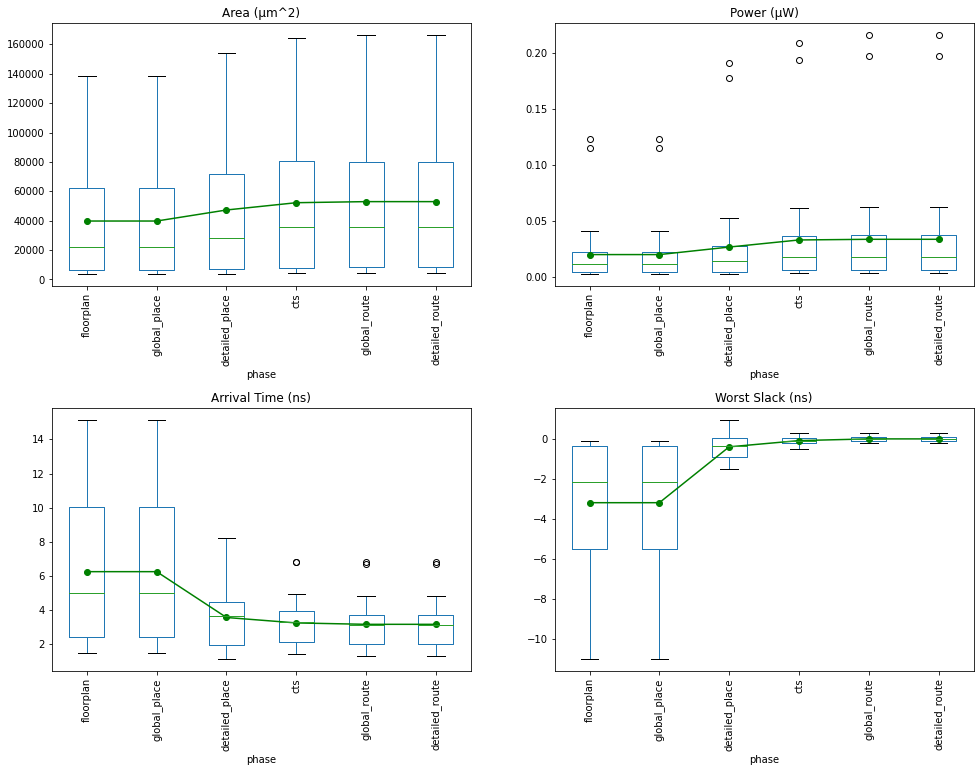

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
fig.tight_layout(pad=10)

columns = ["total_area", "total_power", "worst_arrival_time", "worst_slack"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)", "Worst Slack (ns)"]

for i, metric in enumerate(columns):
    df.boxplot(column=[metric], by="phase", grid=False, ax=axes[i], showfliers=True)
    means = df.groupby("phase")[metric].mean()
    x_positions = list(range(1, len(means) + 1))
    axes[i].plot(x_positions, means, marker='o', color='green')
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

fig.suptitle('')
plt.show()